In [1]:
#correlation matrix
library(FactoMineR)
library(RSQLite)
drv = SQLite()
conn = dbConnect(drv, dbname = './database')
# #getting max exp for genes where dev expression is highest, then bind to results for not dev expression
result <- dbGetQuery(conn, 'SELECT 
                              gene_features.id, 
                              gene_features.gLength,
                              gene_features.cds_len,  
                              gene_features.unique_domains, 
                              gene_features.domains, 
                              gene_features.motif_number_1k, 
                              gene_features.gc3, 
                              gene_features.max_exp,
                              gene_features.specificity,
                              gene_features.trans_count,
                              gene_features.intron_count,
                              gene_features.intron_length,
                              gene_features.avg_intron,
                              gene_features.PPIs,
                              dn_ds,
                              dup_type
                            FROM 
                              gene_features
                            INNER JOIN 
                              macaque_paralogs 
                            ON 
                              gene_features.id == macaque_paralogs.id
                            WHERE 
                              NOT macaque_paralogs.dn_ds IS NULL
                              AND macaque_paralogs.dn_ds < 10
                              AND (dup_type == "WGD" OR dup_type == "SSD")')[,-1]
result <- na.omit(result)
print(nrow(result))


result$gLength <- log10(result$gLength)
result$max_exp <- log10(result$max_exp)
result$gc3 <- 100 * result$gc3
library("Hmisc")
res2 <- rcorr(as.matrix(result[,-15]), type = 'pearson')
corr <- res2$r
pval <- res2$P

write.csv(corr, file= 'corr.csv')
write.csv(pval, file= 'corr_pval.csv')

res3 <- rcorr(as.matrix(result[,-15]), type = 'spearman')
corr2 <- res3$r
pval2 <- res3$P

write.csv(corr2, file= 'corr_spearman.csv')
write.csv(pval2, file= 'corr_pval_spearman.csv')

# for (i in 1:length(names(result)))
# {
#     for (j in 1:length(names(result)))
#     {
#         cor = cor.test(result[,i], result[,j], method = 'pearson')
#         print(names(result[i]))
#         print(names(result[j]))
#         print(cor$p.value)
#         print(cor$estimate['cor'])
#     }
# }

Warning message:
“package ‘FactoMineR’ was built under R version 3.3.2”Warning message:
“package ‘RSQLite’ was built under R version 3.3.2”

[1] 5996


Loading required package: lattice
Loading required package: survival
Loading required package: Formula
Warning message:
“package ‘Formula’ was built under R version 3.3.2”Loading required package: ggplot2
Warning message:
“package ‘ggplot2’ was built under R version 3.3.2”
Attaching package: ‘Hmisc’

The following objects are masked from ‘package:base’:

    format.pval, round.POSIXt, trunc.POSIXt, units



In [2]:
corr

,gLength,cds_len,unique_domains,domains,motif_number_1k,gc3,max_exp,specificity,trans_count,intron_count,intron_length,avg_intron,PPIs,dn_ds
gLength,1.00000000,0.430443406,0.268982112,0.204879865,0.40042013,-0.32261688,-0.038807489,-0.19541319,0.27965018,0.55255896,0.67354053,0.531818032,0.03865260,-0.16262849
cds_len,0.43044341,1.000000000,0.419263840,0.570275664,0.25906733,-0.12424270,0.001857297,-0.09403516,0.12860563,0.76384145,0.31944504,0.053161055,0.02860526,-0.10998253
unique_domains,0.26898211,0.419263840,1.000000000,0.606902421,0.14843321,-0.07119424,0.002621009,-0.07449128,0.09934273,0.44863090,0.20614006,0.003571138,0.09170084,-0.14928512
domains,0.20487987,0.570275664,0.606902421,1.000000000,0.09951045,-0.10033495,0.008874749,-0.05139217,0.06541176,0.51469916,0.17921892,-0.005560709,0.02542061,-0.07432042
motif_number_1k,0.40042013,0.259067327,0.148433208,0.099510454,1.00000000,0.10149093,0.060755018,-0.19637766,0.20931941,0.30036187,0.37887520,0.230676860,0.11410719,-0.18771908
gc3,-0.32261688,-0.124242701,-0.071194239,-0.100334950,0.10149093,1.00000000,0.091255441,0.22132067,-0.09676529,-0.16309892,-0.17276239,-0.105949283,-0.03249471,-0.24423781
max_exp,-0.03880749,0.001857297,0.002621009,0.008874749,0.06075502,0.09125544,1.000000000,0.04884295,0.09145078,0.07230560,-0.05796416,-0.076171808,0.13264933,-0.16988072
specificity,-0.19541319,-0.094035156,-0.074491285,-0.051392168,-0.19637766,0.22132067,0.048842948,1.00000000,-0.15838139,-0.08718111,-0.07196865,-0.041046344,-0.15956944,0.17968127
trans_count,0.27965018,0.128605634,0.099342726,0.065411761,0.20931941,-0.09676529,0.091450781,-0.15838139,1.00000000,0.36556143,0.20406795,0.016296517,0.14846374,-0.05493614
intron_count,0.55255896,0.763841450,0.448630899,0.514699161,0.30036187,-0.16309892,0.072305605,-0.08718111,0.36556143,1.00000000,0.39537305,0.017698465,0.08437447,-0.13512950


In [2]:
corr_results <- result[,c(1:2,10,12)] #maybe remove unique domains (~0.9 corr with domains) and int len (exactly corr to gLen)
nrow(corr_results) #indexes for those features are 3, 11
#PCA
png('tester.png', width = 1000, height = 500)
pca_res <- PCA(corr_results, graph = F)
plot(pca_res)
# pca_res$eig
# pca_res$var$cor
dev.off()

[1] 5996

pdf 
  2

In [3]:
PCA1 <- pca_res$ind$coord[,1]

PCA2 <- pca_res$ind$coord[,2]
length(PCA1)

[1] 5996

In [4]:
pca_res$eig
pca_res$var$cor
pca_res$var$contrib
sum(pca_res$var$contrib)

,eigenvalue,percentage of variance,cumulative percentage of variance
comp 1,2.2615940,56.539851,56.53985
comp 2,1.2029839,30.074597,86.61445
comp 3,0.3535497,8.838743,95.45319
comp 4,0.1818724,4.546809,100.00000


,Dim.1,Dim.2,Dim.3,Dim.4
gLength,0.8257427,0.3833065,-0.3697833,-0.1857026
cds_len,0.8220421,-0.3989567,0.3562119,-0.1954313
intron_count,0.8649135,-0.3823235,-0.1124331,0.3051428
avg_intron,0.3948601,0.8664423,0.2779962,0.1268124


,Dim.1,Dim.2,Dim.3,Dim.4
gLength,30.149130,12.21329,38.676234,18.961346
cds_len,29.879511,13.23097,35.889409,21.000108
intron_count,33.077351,12.15073,3.575508,51.196415
avg_intron,6.894008,62.40501,21.858849,8.842131


[1] 400

In [5]:
non_corr <- result[,c(4:9,13:15)]
nrow(non_corr)

[1] 5996

In [8]:
final_df <- cbind(non_corr, PCA1, PCA2)
nrow(final_df)

[1] 5996

In [9]:
write.csv(final_df, file= 'final_feature_dataset.csv')

In [10]:
for(i in 1:nrow(final_df)) #makes 1 and 0 strings for some stupid reason
{
    if(final_df[i,]['dup_type'] == 'WGD')
    {
        final_df[i,]['dup_type'] <- 1
    }
    if(final_df[i,]['dup_type'] == 'SSD')
    {
        final_df[i,]['dup_type'] <- 0
    }
}

In [11]:
final_df$dup_type <- as.numeric(final_df$dup_type)
# train <- final_df[1:5000,]

In [21]:
model <- glm(dup_type ~ .^2, data = final_df, family = binomial)

In [22]:
summary(model)


Call:
glm(formula = dup_type ~ .^2, family = binomial, data = final_df)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-3.6828  -1.0435   0.6590   0.8747   3.7001  

Coefficients:
                              Estimate Std. Error z value Pr(>|z|)    
(Intercept)                 -3.061e-01  1.311e+00  -0.234 0.815299    
domains                     -7.668e-01  1.073e-01  -7.145 9.00e-13 ***
motif_number_1k             -2.833e-02  2.061e-02  -1.374 0.169357    
gc3                          8.116e-03  1.576e-02   0.515 0.606515    
max_exp                      5.436e-01  4.969e-01   1.094 0.273976    
specificity                  2.627e+00  1.422e+00   1.847 0.064805 .  
trans_count                  7.810e-02  5.381e-02   1.452 0.146639    
PPIs                        -2.686e-03  3.201e-03  -0.839 0.401348    
dn_ds                       -1.243e+00  1.160e+00  -1.071 0.283948    
PCA1                         6.122e-01  2.226e-01   2.751 0.005950 ** 
PCA2             

In [194]:
for(i in 1:length(s$coefficients[,'Pr(>|t|)']))
{
    if(s$coefficients[,'Pr(>|t|)'][i] < 0.05)
    {
        print(row.names(s$coefficients)[i])
    }
}


[1] "(Intercept)"
[1] "exp"


Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”

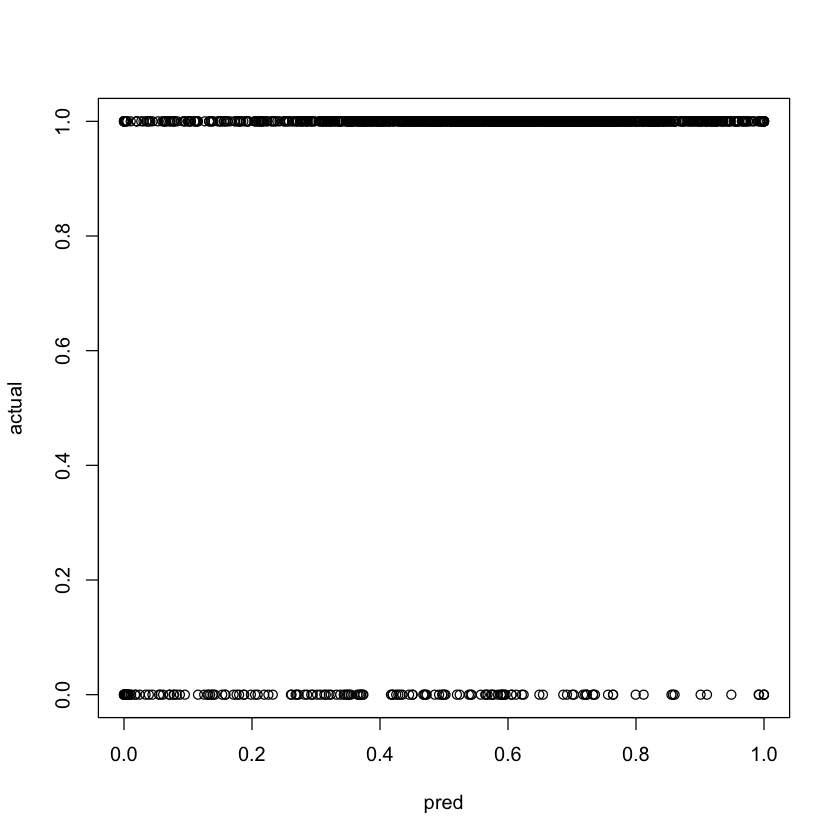

In [16]:
# train <- final_df[1:4000,]
# test <- final_df[4001:nrow(final_df),]
model <- glm(dup_type ~ . ^4, data = train, family = binomial)
pred <- predict(model, test, type='response')
actual <- test$dup_type
plot(pred, actual)

In [31]:
model2 <- glm(dup_type ~ (dn_ds + PCA1 + PCA2)^2 -PCA1:dn_ds -PCA1:PCA2, data = train, family = binomial)

summary(model2)


Call:
glm(formula = dup_type ~ (dn_ds + PCA1 + PCA2)^2 - PCA1:dn_ds - 
    PCA1:PCA2, family = binomial, data = train)

Deviance Residuals: 
   Min      1Q  Median      3Q     Max  
-2.706  -1.167   0.726   0.941   3.020  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)  1.11443    0.05369  20.757  < 2e-16 ***
dn_ds       -2.61111    0.16841 -15.504  < 2e-16 ***
PCA1         0.24881    0.02603   9.558  < 2e-16 ***
PCA2         0.14799    0.06495   2.278  0.02270 *  
dn_ds:PCA2   0.57155    0.21688   2.635  0.00841 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 5386.5  on 3999  degrees of freedom
Residual deviance: 4889.3  on 3995  degrees of freedom
AIC: 4899.3

Number of Fisher Scoring iterations: 4


In [ ]:
d <- seq(6, 0, -0.01)
g <- seq(0.2, 1, length.out = length(d))
p1 <- seq(-4, 25, length.out = length(d))
p2 <- seq(-18, 17, length.out = length(d))

test_df <- data.frame(d,g,p1,p2)
names(test_df) <- c('dn_ds', 'gc3', 'PCA1', 'PCA2')
test_df[1:200,]

In [24]:
# Create Training Data
input_ones <- final_df[which(final_df$dup_type == 1), ]  # all 1's
input_zeros <- final_df[which(final_df$dup_type == 0), ]  # all 0's
set.seed(100)  # for repeatability of samples
input_ones_training_rows <- sample(1:nrow(input_ones), 0.6*nrow(input_ones))  # 1's for training
input_zeros_training_rows <- sample(1:nrow(input_zeros), 0.6*nrow(input_ones))  # 0's for training. Pick as many 0's as 1's
training_ones <- input_ones[input_ones_training_rows, ]  
training_zeros <- input_zeros[input_zeros_training_rows, ]
train <- rbind(training_ones, training_zeros)  # row bind the 1's and 0's 

# Create Test Data
test_ones <- input_ones[-input_ones_training_rows, ]
test_zeros <- input_zeros[-input_zeros_training_rows, ]
test <- rbind(test_ones, test_zeros)  # row bind the 1's and 0's 

In [67]:
model <- glm(dup_type ~ ., data = train, family = 'binomial')
Co <- model$coefficients
s <- summary(model)

In [68]:
p <- s$coefficients[,4]

In [69]:
comp <- cbind(Co, p)

comp <- as.data.frame(comp)
all_vars_sorted <- comp[with(comp, order(Co,p)),]

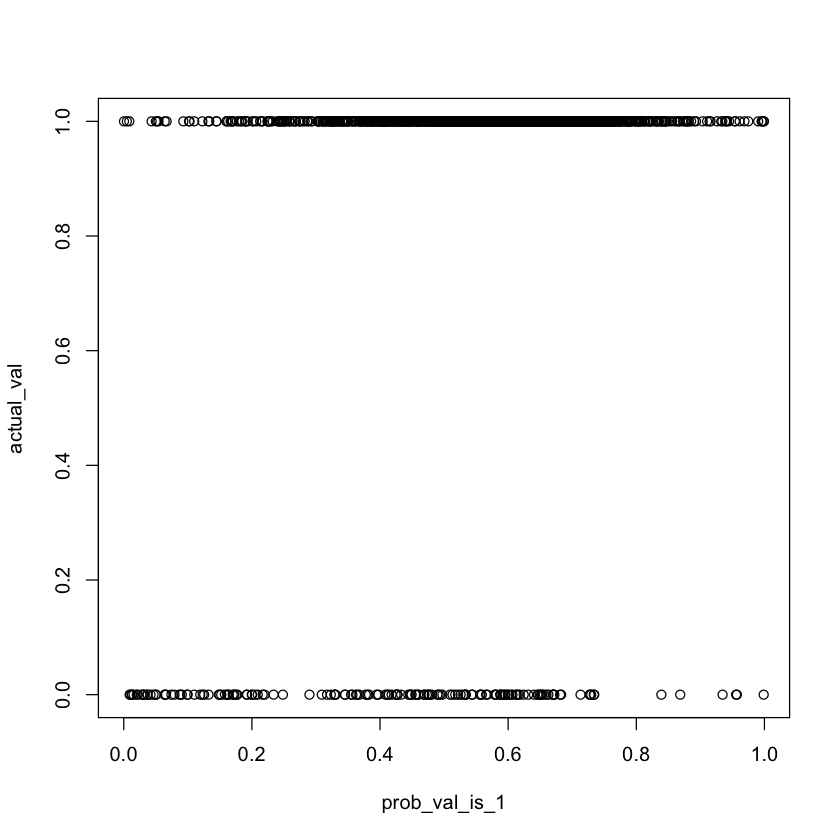

In [28]:
actual_val <- test$dup_type
prob_val_is_1 <- predict(model, test, type = 'response')
plot(prob_val_is_1, actual_val)

In [71]:
two_way_sorted

,Co,p
specificity:dn_ds,-4.185981e+00,7.410848e-04
(Intercept),-2.760268e+00,6.629074e-02
max_exp:specificity,-1.856490e+00,5.880364e-04
domains,-5.806431e-01,2.132281e-06
domains:dn_ds,-3.196580e-01,3.037361e-03
PCA2,-2.957332e-01,4.341135e-01
specificity:PCA1,-1.583295e-01,5.191245e-01
gc3:specificity,-3.558706e-02,4.102533e-02
trans_count:dn_ds,-3.045343e-02,5.391380e-01
trans_count:PCA2,-2.467997e-02,1.623130e-02


Warning message:
“package ‘pROC’ was built under R version 3.3.2”Type 'citation("pROC")' for a citation.

Attaching package: ‘pROC’

The following objects are masked from ‘package:stats’:

    cov, smooth, var




Call:
roc.default(response = actual_val, predictor = prob_val_is_1,     plot = TRUE)

Data: prob_val_is_1 in 164 controls (actual_val 0) < 1458 cases (actual_val 1).
Area under the curve: 0.7396

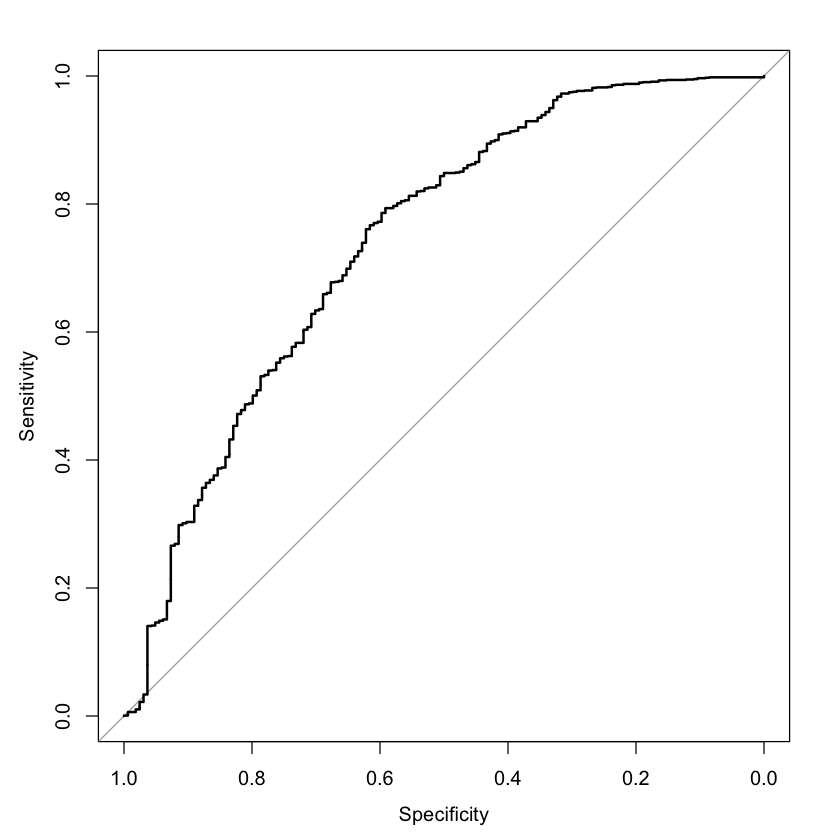

In [29]:
# install.packages('pROC')
library(pROC)
roc(actual_val, prob_val_is_1, plot = TRUE)

In [19]:
test <- final_df[5001:nrow(final_df),]

In [20]:
nrow(final_df)

[1] 3432

In [81]:
nrow(final_df)

[1] 6889

In [67]:
table(prob_val_is_1)

prob_val_is_1
2.22898704807385e-08 3.24247474478045e-05 4.40634563568349e-05 
                   1                    1                    1 
0.000435765600432012 0.000502193864403828 0.000921373530181041 
                   1                    1                    1 
 0.00105861157938999  0.00110470281869042  0.00183203443628628 
                   1                    1                    1 
 0.00225277830452152  0.00411201980633655  0.00451353634758012 
                   1                    1                    1 
 0.00681714208355073  0.00978658065265897   0.0111747674413409 
                   1                    1                    1 
  0.0131100050679642   0.0142744236275841   0.0147448132974001 
                   1                    1                    1 
  0.0180120408553704   0.0181074008052706   0.0223839516702849 
                   1                    1                    1 
  0.0225437359963487   0.0230570527946667   0.0235531549640314 
                   1      

In [72]:
train <- final_df[1:6000,]
test <- final_df[6001:nrow(final_df),]


In [13]:
library(FactoMineR)
library(RSQLite)
drv = SQLite()
conn = dbConnect(drv, dbname = './database2')
result <- dbGetQuery(conn, 'SELECT h_exp, m_exp, tissue FROM brawand_exp WHERE (h_id IN (SELECT id1 FROM supp_table WHERE dup_age == "Oran")) OR (h_id IN (SELECT id2 FROM supp_table WHERE dup_age == "Oran"))')
species <- numeric(nrow(result))
result <- cbind(result,species)
names(result[3]) <- 'Species'
model <- lm(h_exp ~ m_exp, data = result)
summary(model)


Call:
lm(formula = h_exp ~ m_exp, data = result)

Residuals:
    Min      1Q  Median      3Q     Max 
-33.368  -2.942   0.846   5.855  12.088 

Coefficients:
             Estimate Std. Error  t value Pr(>|t|)    
(Intercept) -6.110472   2.087945   -2.927  0.00834 ** 
m_exp        1.911192   0.001336 1430.070  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 9.561 on 20 degrees of freedom
Multiple R-squared:      1,	Adjusted R-squared:      1 
F-statistic: 2.045e+06 on 1 and 20 DF,  p-value: < 2.2e-16


In [16]:
cbind(result$tissue, model$residuals)

1,ht F,-33.3680871354737
2,lv M,6.32657536487969
3,br M,-4.3824377439952
4,ts M 1,5.37149501319341
5,kd M,-0.465927873869656
6,br F,-5.51653270524225
7,cb F,-2.47900934585798
8,kd F,5.338620257991
9,ht M,-7.24881785612281
10,cb M,-2.96707111626196
11,ts M 2,1.41684386096561


In [12]:
nrow(result)

[1] 22